In [22]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import numpy as np
from mnist import MNIST
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
emnist_data = MNIST(path='data/', return_type='numpy')
emnist_data.select_emnist('letters')
x, y = emnist_data.load_training()

In [27]:
print(x.shape)
print(y.shape)

(124800, 784)
(124800,)


In [28]:
x = x.reshape(124800, 28, 28, 1)
#y = y.reshape(124800, 1)

In [29]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [30]:
y = y-1
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
print(x_train.shape)
print(x_test.shape)

(99840, 28, 28, 1)
(24960, 28, 28, 1)


In [33]:
data_generator = ImageDataGenerator(rescale=1./255)

In [50]:
batch_size = 32
num_classes = 26

In [51]:
train_set = data_generator.flow(x_train, y_train, batch_size)
test_set = data_generator.flow(x_test, y_test, batch_size)

In [52]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1) ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
checkpoint = ModelCheckpoint('model/handwriting_bestmodel.hdf5', save_best_only=True, monitor="val_accuracy", mode='max', save_weights_only=False)  

In [55]:
hist= model.fit(train_set,
        epochs = 10,
        validation_data = test_set,
        callbacks=[checkpoint])

Epoch 1/10
3120/3120 [==============================] - 23s 7ms/step - loss: 0.6767 - accuracy: 0.7997 - val_loss: 0.2265 - val_accuracy: 0.9283
Epoch 2/10
3120/3120 [==============================] - 22s 7ms/step - loss: 0.2412 - accuracy: 0.9197 - val_loss: 0.2304 - val_accuracy: 0.9270
Epoch 3/10
3120/3120 [==============================] - 22s 7ms/step - loss: 0.2017 - accuracy: 0.9323 - val_loss: 0.2055 - val_accuracy: 0.9334
Epoch 4/10
3120/3120 [==============================] - 22s 7ms/step - loss: 0.1733 - accuracy: 0.9389 - val_loss: 0.1918 - val_accuracy: 0.93970.1732 - accuracy: 0. - ETA: 0s - loss: 0.1732 - 
Epoch 5/10
3120/3120 [==============================] - 22s 7ms/step - loss: 0.1534 - accuracy: 0.9463 - val_loss: 0.1951 - val_accuracy: 0.9399
Epoch 6/10
3120/3120 [==============================] - 22s 7ms/step - loss: 0.1393 - accuracy: 0.9504 - val_loss: 0.1865 - val_accuracy: 0.9438
Epoch 7/10
3120/3120 [==============================] - 22s 7ms/step - loss: 0.12

In [56]:
# Evaluate the model from the last epoch
score = model.evaluate(test_set, verbose=0 )
print( "Test results (model from the last epoch):", [ (model.metrics_names[i], score[i]) for i in range(len(score)) ] )

# Load and evaluate the model from the best epoch
best_model = load_model('model/handwriting_bestmodel.hdf5', compile=True )
score = best_model.evaluate(test_set, verbose=0 )
print( "Test results (model from the best epoch):", [ (best_model.metrics_names[i], score[i]) for i in range(len(score)) ] )

Test results (model from the last epoch): [('loss', 0.1997484415769577), ('accuracy', 0.9448717832565308)]
Test results (model from the best epoch): [('loss', 0.1802448183298111), ('accuracy', 0.9461939334869385)]


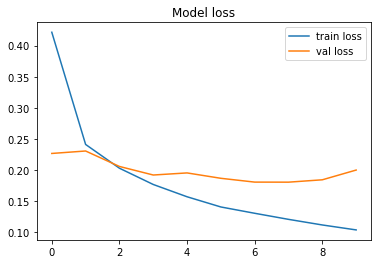

In [57]:
# loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.legend()
plt.show()

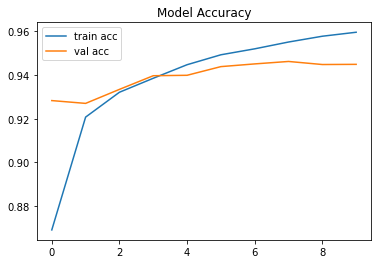

In [58]:
# accuracies
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()